#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [13]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [17]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [18]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(10, activation='softmax'))

In [20]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [28]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)  

Epoch 1/10
2500/2500 [==============================] - 143s 57ms/step - loss: 0.1303 - accuracy: 0.7248 - val_loss: 0.1392 - val_accuracy: 0.7116
Epoch 2/10
2500/2500 [==============================] - 113s 45ms/step - loss: 0.1173 - accuracy: 0.7522 - val_loss: 0.1419 - val_accuracy: 0.7008
Epoch 3/10
2500/2500 [==============================] - 102s 41ms/step - loss: 0.1032 - accuracy: 0.7884 - val_loss: 0.1346 - val_accuracy: 0.7189
Epoch 4/10
2500/2500 [==============================] - 111s 44ms/step - loss: 0.0938 - accuracy: 0.8102 - val_loss: 0.1343 - val_accuracy: 0.7174
Epoch 5/10
2500/2500 [==============================] - 92s 37ms/step - loss: 0.0846 - accuracy: 0.8288 - val_loss: 0.1344 - val_accuracy: 0.7164
Epoch 6/10
2500/2500 [==============================] - 90s 36ms/step - loss: 0.0759 - accuracy: 0.8493 - val_loss: 0.1343 - val_accuracy: 0.7241
Epoch 7/10
2500/2500 [==============================] - 97s 39ms/step - loss: 0.0717 - accuracy: 0.8608 - val_loss: 0.13

In [29]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

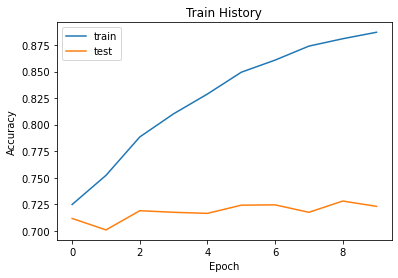

In [31]:
show_train_history('accuracy','val_accuracy')

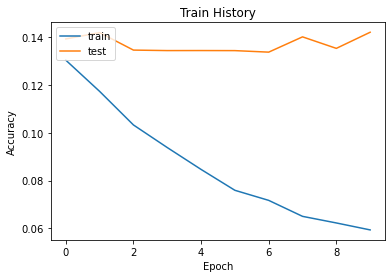

In [32]:
show_train_history('loss','val_loss')

In [33]:
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)  

Epoch 1/10
2500/2500 [==============================] - 110s 44ms/step - loss: 0.0176 - accuracy: 0.8831 - val_loss: 0.0400 - val_accuracy: 0.7205
Epoch 2/10
2500/2500 [==============================] - 118s 47ms/step - loss: 0.0177 - accuracy: 0.8822 - val_loss: 0.0411 - val_accuracy: 0.7218
Epoch 3/10
2500/2500 [==============================] - 142s 57ms/step - loss: 0.0179 - accuracy: 0.8838 - val_loss: 0.0411 - val_accuracy: 0.7239
Epoch 4/10
2500/2500 [==============================] - 134s 53ms/step - loss: 0.0177 - accuracy: 0.8862 - val_loss: 0.0430 - val_accuracy: 0.7118
Epoch 5/10
2500/2500 [==============================] - 112s 45ms/step - loss: 0.0186 - accuracy: 0.8829 - val_loss: 0.0457 - val_accuracy: 0.7069
Epoch 6/10
2500/2500 [==============================] - 115s 46ms/step - loss: 0.0185 - accuracy: 0.8828 - val_loss: 0.0447 - val_accuracy: 0.7068
Epoch 7/10
2500/2500 [==============================] - 109s 44ms/step - loss: 0.0185 - accuracy: 0.8848 - val_loss: 0

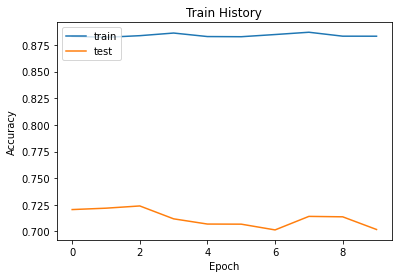

In [34]:
show_train_history('accuracy','val_accuracy')

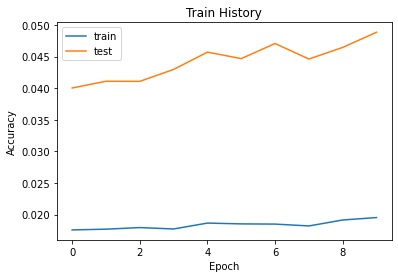

In [35]:
show_train_history('loss','val_loss')